**Import the necessary libraries for the project**

In [96]:
import requests
import json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os

**Use the get method to request the Time Series Daily API from AlphaVantage with my API Key, and assign it to the variable "SNP." This shows the daily data over the past 20 years for the SPY Exchange Traded Fund, which tracks the S&P 500. Status Code 200 means everything is OK and the connection is successful.**

In [97]:
API_Key = os.getenv('API_Key')

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPY&outputsize=full&apikey=API_Key'

SNP = requests.get(url)
SNP

<Response [200]>

**Pull the data from the API and store it in the "SNP_data" variable in the text format**

In [98]:
SNP_data = SNP.text
SNP_data

'{\n    "Meta Data": {\n        "1. Information": "Daily Time Series with Splits and Dividend Events",\n        "2. Symbol": "SPY",\n        "3. Last Refreshed": "2022-11-18",\n        "4. Output Size": "Full size",\n        "5. Time Zone": "US/Eastern"\n    },\n    "Time Series (Daily)": {\n        "2022-11-18": {\n            "1. open": "397.74",\n            "2. high": "397.81",\n            "3. low": "393.04",\n            "4. close": "396.03",\n            "5. adjusted close": "396.03",\n            "6. volume": "92922451",\n            "7. dividend amount": "0.0000",\n            "8. split coefficient": "1.0"\n        },\n        "2022-11-17": {\n            "1. open": "390.46",\n            "2. high": "394.95",\n            "3. low": "390.14",\n            "4. close": "394.24",\n            "5. adjusted close": "394.24",\n            "6. volume": "74496255",\n            "7. dividend amount": "0.0000",\n            "8. split coefficient": "1.0"\n        },\n        "2022-11-16":

**Convert the text into a json format, parsing it through json using the loads method and then save it to the variable "SNPjson". When you parse json, you convert a string containing a json document into a structured data object that you can operate on. Then, print the data in json format**

In [99]:
SNPjson = json.loads(SNP_data)
print(SNPjson)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'SPY', '3. Last Refreshed': '2022-11-18', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2022-11-18': {'1. open': '397.74', '2. high': '397.81', '3. low': '393.04', '4. close': '396.03', '5. adjusted close': '396.03', '6. volume': '92922451', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2022-11-17': {'1. open': '390.46', '2. high': '394.95', '3. low': '390.14', '4. close': '394.24', '5. adjusted close': '394.24', '6. volume': '74496255', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2022-11-16': {'1. open': '396.78', '2. high': '397.78', '3. low': '394.79', '4. close': '395.45', '5. adjusted close': '395.45', '6. volume': '68508454', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2022-11-15': {'1. open': '401.15', '2. high': '402.31', '3. low': '394.49', '4. close': '398.49', '5. adjusted clos

**Print the entire DataFrame, saving it to the variable "SNP_df"**

In [100]:
SNP_df = pd.DataFrame(SNPjson)
SNP_df

Meta Data  \
1. Information     Daily Time Series with Splits and Dividend Events   
2. Symbol                                                        SPY   
3. Last Refreshed                                         2022-11-18   
4. Output Size                                             Full size   
5. Time Zone                                              US/Eastern   
...                                                              ...   
1999-11-05                                                       NaN   
1999-11-04                                                       NaN   
1999-11-03                                                       NaN   
1999-11-02                                                       NaN   
1999-11-01                                                       NaN   

                                                 Time Series (Daily)  
1. Information                                                   NaN  
2. Symbol                                                        NaN  
3. Last Refreshed                                                NaN  
4. Output Size                                                   NaN  
5. Time Zone                                                     NaN  
...                                                              ...  
1999-11-05         {'1. open': '138.625', '2. high': '139.109299'...  
1999-11-04         {'1. open': '136.75', '2. high': '137.359299',...  
1999-11-03         {'1. open': '136.0', '2. high': '136.375', '3....  
1999-11-02         {'1. open': '135.968704', '2. high': '137.25',...  
1999-11-01         {'1. open': '136.5', '2. high': '137.0', '3. l...  

[5807 rows x 2 columns]

**Set Index to a Column in the DataFrame, so the dates can be used as part of the data. This is done using the reset_index method.**

In [101]:
SNP_df.reset_index(inplace=True)
SNP_df.head()

index                                          Meta Data  \
0     1. Information  Daily Time Series with Splits and Dividend Events   
1          2. Symbol                                                SPY   
2  3. Last Refreshed                                         2022-11-18   
3     4. Output Size                                          Full size   
4       5. Time Zone                                         US/Eastern   

  Time Series (Daily)  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

**Use the drop method to drop the Meta Data Column**

In [102]:
SNP_df = SNP_df.drop(labels='Meta Data', axis=1)
SNP_df.head()

index Time Series (Daily)
0     1. Information                 NaN
1          2. Symbol                 NaN
2  3. Last Refreshed                 NaN
3     4. Output Size                 NaN
4       5. Time Zone                 NaN

**Rename the remaining Columns Date and Daily**

In [103]:
SNP_df.columns = ['Date', 'Daily']
SNP_df.head()

Date Daily
0     1. Information   NaN
1          2. Symbol   NaN
2  3. Last Refreshed   NaN
3     4. Output Size   NaN
4       5. Time Zone   NaN

**Remove the first 5 unnecessary Rows from the DataFrame using the iloc function**

In [104]:
SNP_df = SNP_df.iloc[5:]
SNP_df.head()

Date                                              Daily
5  2022-11-18  {'1. open': '397.74', '2. high': '397.81', '3....
6  2022-11-17  {'1. open': '390.46', '2. high': '394.95', '3....
7  2022-11-16  {'1. open': '396.78', '2. high': '397.78', '3....
8  2022-11-15  {'1. open': '401.15', '2. high': '402.31', '3....
9  2022-11-14  {'1. open': '396.66', '2. high': '400.1799', '...

**The Daily column is made up of Dictionary values, so I need to take the keys and create a column out of each, then drop the Daily Column.**

In [105]:
SNP_df = pd.concat([SNP_df.drop(['Daily'], axis=1), SNP_df['Daily'].apply(pd.Series)], axis=1)
SNP_df.head()

Date 1. open   2. high  3. low 4. close 5. adjusted close 6. volume  \
5  2022-11-18  397.74    397.81  393.04   396.03            396.03  92922451   
6  2022-11-17  390.46    394.95  390.14   394.24            394.24  74496255   
7  2022-11-16  396.78    397.78  394.79   395.45            395.45  68508454   
8  2022-11-15  401.15    402.31  394.49   398.49            398.49  93194452   
9  2022-11-14  396.66  400.1799  394.83   395.12            395.12  71893165   

  7. dividend amount 8. split coefficient  
5             0.0000                  1.0  
6             0.0000                  1.0  
7             0.0000                  1.0  
8             0.0000                  1.0  
9             0.0000                  1.0

**Rename all of the columns to make the DataFrame more attractive**

In [106]:
SNP_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume', 'Dividend', 'Split Coefficient']
SNP_df.head()

Date    Open      High     Low   Close Adjusted Close    Volume  \
5  2022-11-18  397.74    397.81  393.04  396.03         396.03  92922451   
6  2022-11-17  390.46    394.95  390.14  394.24         394.24  74496255   
7  2022-11-16  396.78    397.78  394.79  395.45         395.45  68508454   
8  2022-11-15  401.15    402.31  394.49  398.49         398.49  93194452   
9  2022-11-14  396.66  400.1799  394.83  395.12         395.12  71893165   

  Dividend Split Coefficient  
5   0.0000               1.0  
6   0.0000               1.0  
7   0.0000               1.0  
8   0.0000               1.0  
9   0.0000               1.0

**Drop the columns that will not be visualized on the Line Chart**

In [107]:
SNP_df = SNP_df.drop(['Open', 'High', 'Low', 'Adjusted Close', 'Volume', 'Dividend', 'Split Coefficient'], axis=1)
SNP_df

Date       Close
5     2022-11-18      396.03
6     2022-11-17      394.24
7     2022-11-16      395.45
8     2022-11-15      398.49
9     2022-11-14      395.12
...          ...         ...
5802  1999-11-05     137.875
5803  1999-11-04  136.531204
5804  1999-11-03       135.5
5805  1999-11-02  134.593704
5806  1999-11-01    135.5625

[5802 rows x 2 columns]

**Change the data type of the Close column from String to Float, and change the data type of the Date column to Datetime, since they are the data we will be plotting**

In [108]:
SNP_df.Close = SNP_df.Close.astype(float)
SNP_df['Date'] = pd.to_datetime(SNP_df['Date'])
SNP_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

**Filter the dataset to show the dates from the beginning to the end of the 2008 Housing Crash. The datasets will be sorted so that the dates go from earliest to most recent**

In [109]:
SPY2008 = SNP_df[(SNP_df['Date'] > '2007-10-09') & (SNP_df['Date'] < '2009-03-10')]
SPY2008 = SPY2008.sort_index(axis=0, ascending=False)
SPY2008

Date       Close
3810 2007-10-10  156.220001
3809 2007-10-11  155.470001
3808 2007-10-12  156.330002
3807 2007-10-15  155.009995
3806 2007-10-16  153.779999
...         ...         ...
3460 2009-03-03   70.070000
3459 2009-03-04   71.730003
3458 2009-03-05   68.800003
3457 2009-03-06   68.919998
3456 2009-03-09   68.110001

[355 rows x 2 columns]

**Filter the dataset to show the dates from the beginning to the end of the Covid Market Crash**

In [110]:
SPY2020 = SNP_df[(SNP_df['Date'] > '2020-02-19') & (SNP_df['Date'] < '2020-03-24')]
SPY2020 = SPY2020.sort_index(axis=0, ascending=False)
SPY2020

Date   Close
699 2020-02-20  336.95
698 2020-02-21  333.48
697 2020-02-24  322.42
696 2020-02-25  312.65
695 2020-02-26  311.50
694 2020-02-27  297.51
693 2020-02-28  296.26
692 2020-03-02  309.09
691 2020-03-03  300.24
690 2020-03-04  312.86
689 2020-03-05  302.46
688 2020-03-06  297.46
687 2020-03-09  274.23
686 2020-03-10  288.42
685 2020-03-11  274.36
684 2020-03-12  248.11
683 2020-03-13  269.32
682 2020-03-16  239.85
681 2020-03-17  252.80
680 2020-03-18  240.00
679 2020-03-19  240.51
678 2020-03-20  228.80
677 2020-03-23  222.95

**Filter the dataset to show the dates of the current Stock Market downturn**

In [111]:
SPY2022 = SNP_df[(SNP_df['Date'] > '2022-01-03') & (SNP_df['Date'] < '2022-10-22')]
SPY2022 = SPY2022.sort_index(axis=0, ascending=False)
SPY2022

Date   Close
226 2022-01-04  477.55
225 2022-01-05  468.38
224 2022-01-06  467.94
223 2022-01-07  466.09
222 2022-01-10  465.51
..         ...     ...
29  2022-10-17  366.82
28  2022-10-18  371.13
27  2022-10-19  368.50
26  2022-10-20  365.41
25  2022-10-21  374.29

[202 rows x 2 columns]

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the SPY ETF, which follow the S&P 500, during the 2008 Housing Crash**

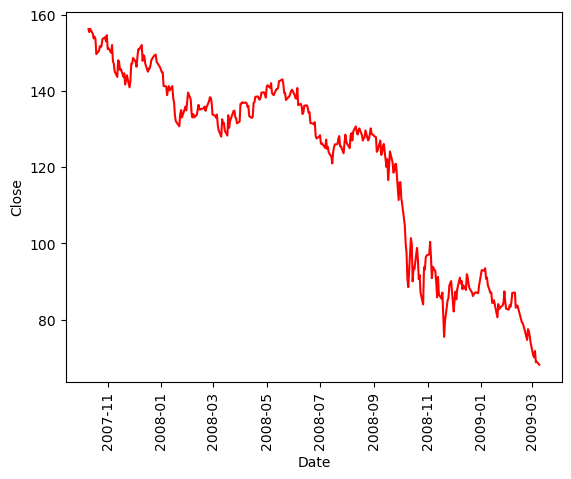

In [112]:
sns.lineplot(data=SPY2008, x='Date', y='Close', style_order='whitegrid', color='r')
plt.xticks(rotation=90)
plt.show()

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the SPY ETF during the 2020 Covid Pandemic market**

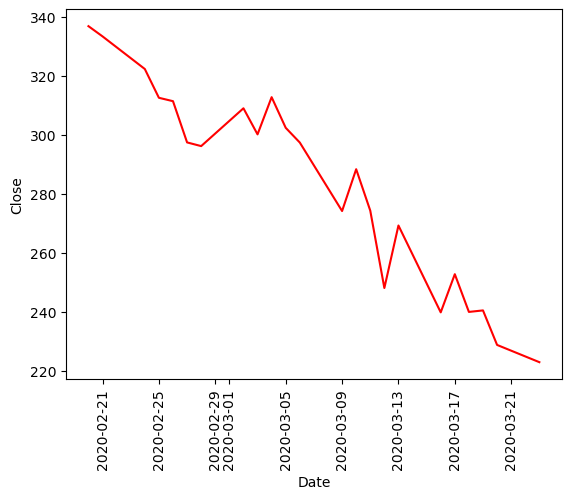

In [113]:
sns.lineplot(data=SPY2020, x='Date', y='Close', style_order='whitegrid', color='r')
plt.xticks(rotation=90)
plt.show()

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the SPY ETF during the current market downturn**

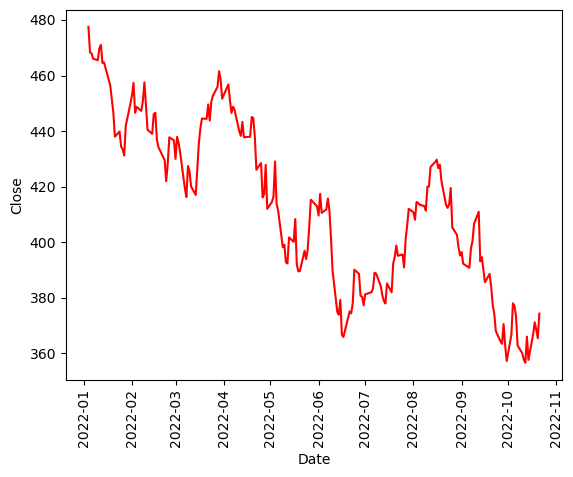

In [114]:
sns.lineplot(data=SPY2022, x='Date', y='Close', style_order='whitegrid', color='r')
plt.xticks(rotation=90)
plt.show()

**Use the get method to request the Time Series Daily API from AlphaVantage with my API Key, and assign it to the variable "TLT." This shows the daily data over the past 20 years for the TLT Exchange Traded Fund, which tracks Long-Term Treasuries. Status Code 200 means everything is OK and the connection is successful.**

In [115]:
API_Key = os.getenv('API_Key')

url2 = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=TLT&outputsize=full&apikey=API_Key'

TLT = requests.get(url2)
TLT

<Response [200]>

**Pull the data from the API and store it in the "TLT_data" variable in the text format**

In [116]:
TLT_data = TLT.text
TLT_data

'{\n    "Meta Data": {\n        "1. Information": "Daily Time Series with Splits and Dividend Events",\n        "2. Symbol": "TLT",\n        "3. Last Refreshed": "2022-11-18",\n        "4. Output Size": "Full size",\n        "5. Time Zone": "US/Eastern"\n    },\n    "Time Series (Daily)": {\n        "2022-11-18": {\n            "1. open": "100.6",\n            "2. high": "100.885",\n            "3. low": "99.545",\n            "4. close": "99.64",\n            "5. adjusted close": "99.64",\n            "6. volume": "14941277",\n            "7. dividend amount": "0.0000",\n            "8. split coefficient": "1.0"\n        },\n        "2022-11-17": {\n            "1. open": "100.2",\n            "2. high": "100.57",\n            "3. low": "99.78",\n            "4. close": "100.33",\n            "5. adjusted close": "100.33",\n            "6. volume": "24536378",\n            "7. dividend amount": "0.0000",\n            "8. split coefficient": "1.0"\n        },\n        "2022-11-16": {\n

**Convert the text into a json format, parsing it through json using the loads method and then save it to the variable "TLTjson". Then, print the data in json format**

In [117]:
TLTjson = json.loads(TLT_data)
print(TLTjson)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'TLT', '3. Last Refreshed': '2022-11-18', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2022-11-18': {'1. open': '100.6', '2. high': '100.885', '3. low': '99.545', '4. close': '99.64', '5. adjusted close': '99.64', '6. volume': '14941277', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2022-11-17': {'1. open': '100.2', '2. high': '100.57', '3. low': '99.78', '4. close': '100.33', '5. adjusted close': '100.33', '6. volume': '24536378', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2022-11-16': {'1. open': '100.02', '2. high': '101.45', '3. low': '99.74', '4. close': '101.4', '5. adjusted close': '101.4', '6. volume': '28507673', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2022-11-15': {'1. open': '98.25', '2. high': '99.3', '3. low': '98.11', '4. close': '99.23', '5. adjusted close': '99.23',

**Print the entire DataFrame, saving it to the variable "TLT_df"**

In [118]:
TLT_df = pd.DataFrame(TLTjson)
TLT_df

Meta Data  \
1. Information     Daily Time Series with Splits and Dividend Events   
2. Symbol                                                        TLT   
3. Last Refreshed                                         2022-11-18   
4. Output Size                                             Full size   
5. Time Zone                                              US/Eastern   
...                                                              ...   
2002-08-01                                                       NaN   
2002-07-31                                                       NaN   
2002-07-30                                                       NaN   
2002-07-29                                                       NaN   
2002-07-26                                                       NaN   

                                                 Time Series (Daily)  
1. Information                                                   NaN  
2. Symbol                                                        NaN  
3. Last Refreshed                                                NaN  
4. Output Size                                                   NaN  
5. Time Zone                                                     NaN  
...                                                              ...  
2002-08-01         {'1. open': '82.54', '2. high': '83.02', '3. l...  
2002-07-31         {'1. open': '81.95', '2. high': '82.8', '3. lo...  
2002-07-30         {'1. open': '81.75', '2. high': '81.9', '3. lo...  
2002-07-29         {'1. open': '82.06', '2. high': '82.16', '3. l...  
2002-07-26         {'1. open': '82.67', '2. high': '82.8', '3. lo...  

[5122 rows x 2 columns]

**Set Index to a Column in the DataFrame, so the dates can be used as part of the data. This is done using the reset_index method.**

In [119]:
TLT_df.reset_index(inplace=True)
TLT_df.head()

index                                          Meta Data  \
0     1. Information  Daily Time Series with Splits and Dividend Events   
1          2. Symbol                                                TLT   
2  3. Last Refreshed                                         2022-11-18   
3     4. Output Size                                          Full size   
4       5. Time Zone                                         US/Eastern   

  Time Series (Daily)  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

**Use the drop method to drop the Meta Data Column**

In [120]:
TLT_df = TLT_df.drop(labels='Meta Data', axis=1)
TLT_df.head()

index Time Series (Daily)
0     1. Information                 NaN
1          2. Symbol                 NaN
2  3. Last Refreshed                 NaN
3     4. Output Size                 NaN
4       5. Time Zone                 NaN

**Rename the remaining Columns Date and Daily**

In [121]:
TLT_df.columns = ['Date', 'Daily']
TLT_df.head()

Date Daily
0     1. Information   NaN
1          2. Symbol   NaN
2  3. Last Refreshed   NaN
3     4. Output Size   NaN
4       5. Time Zone   NaN

**Remove the first 5 unnecessary Rows from the DataFrame using the iloc function**

In [122]:
TLT_df = TLT_df.iloc[5:]
TLT_df.head()

Date                                              Daily
5  2022-11-18  {'1. open': '100.6', '2. high': '100.885', '3....
6  2022-11-17  {'1. open': '100.2', '2. high': '100.57', '3. ...
7  2022-11-16  {'1. open': '100.02', '2. high': '101.45', '3....
8  2022-11-15  {'1. open': '98.25', '2. high': '99.3', '3. lo...
9  2022-11-14  {'1. open': '97.91', '2. high': '97.985', '3. ...

**The Daily column is made up of Dictionary values, so I need to take the keys and create a column out of each, then drop the Daily Column.**

In [123]:
TLT_df = pd.concat([TLT_df.drop(['Daily'], axis=1), TLT_df['Daily'].apply(pd.Series)], axis=1)
TLT_df.head()

Date 1. open  2. high  3. low 4. close 5. adjusted close 6. volume  \
5  2022-11-18   100.6  100.885  99.545    99.64             99.64  14941277   
6  2022-11-17   100.2   100.57   99.78   100.33            100.33  24536378   
7  2022-11-16  100.02   101.45   99.74    101.4             101.4  28507673   
8  2022-11-15   98.25     99.3   98.11    99.23             99.23  26608180   
9  2022-11-14   97.91   97.985   97.09    97.65             97.65  13711928   

  7. dividend amount 8. split coefficient  
5             0.0000                  1.0  
6             0.0000                  1.0  
7             0.0000                  1.0  
8             0.0000                  1.0  
9             0.0000                  1.0

**Rename all of the columns to make the DataFrame more attractive**

In [124]:
TLT_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume', 'Dividend', 'Split Coefficient']
TLT_df.head()

Date    Open     High     Low   Close Adjusted Close    Volume  \
5  2022-11-18   100.6  100.885  99.545   99.64          99.64  14941277   
6  2022-11-17   100.2   100.57   99.78  100.33         100.33  24536378   
7  2022-11-16  100.02   101.45   99.74   101.4          101.4  28507673   
8  2022-11-15   98.25     99.3   98.11   99.23          99.23  26608180   
9  2022-11-14   97.91   97.985   97.09   97.65          97.65  13711928   

  Dividend Split Coefficient  
5   0.0000               1.0  
6   0.0000               1.0  
7   0.0000               1.0  
8   0.0000               1.0  
9   0.0000               1.0

**Change the data type of the Close column from String to Float, and change the data type of the Date column to Datetime, since they are the data we will be plotting**

In [125]:
TLT_df = TLT_df.drop(['Open', 'High', 'Low', 'Adjusted Close', 'Volume', 'Dividend', 'Split Coefficient'], axis=1)
TLT_df

Date   Close
5     2022-11-18   99.64
6     2022-11-17  100.33
7     2022-11-16   101.4
8     2022-11-15   99.23
9     2022-11-14   97.65
...          ...     ...
5117  2002-08-01    83.0
5118  2002-07-31   82.53
5119  2002-07-30   81.52
5120  2002-07-29   81.42
5121  2002-07-26   82.51

[5117 rows x 2 columns]

**Change the data type of the Close column from String to Float, and change the data type of the Date column to Datetime, since they are the data we will be plotting**

In [126]:
TLT_df.Close = TLT_df.Close.astype(float)
TLT_df['Date'] = pd.to_datetime(TLT_df['Date'])
TLT_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

**Filter the dataset to show the dates from the beginning to the end of the 2008 Housing Crash. The datasets will be sorted so that the dates go from earliest to most recent**

In [127]:
TLT2008 = TLT_df[(TLT_df['Date'] > '2007-10-09') & (TLT_df['Date'] < '2009-03-10')]
TLT2008 = TLT2008.sort_index(axis=0, ascending=False)
TLT2008

Date   Close
3810 2007-10-10   88.15
3809 2007-10-11   88.06
3808 2007-10-12   87.63
3807 2007-10-15   87.65
3806 2007-10-16   87.68
...         ...     ...
3460 2009-03-03  102.59
3459 2009-03-04  102.12
3458 2009-03-05  104.96
3457 2009-03-06  104.26
3456 2009-03-09  103.65

[355 rows x 2 columns]

**Filter the dataset to show the dates from the beginning to the end of the Covid Market Crash**

In [128]:
TLT2020 = TLT_df[(SNP_df['Date'] > '2020-02-19') & (TLT_df['Date'] < '2020-03-24')]
TLT2020 = TLT2020.sort_index(axis=0, ascending=False)
TLT2020

C:\Users\mrnal\AppData\Local\Temp\ipykernel_20820\223499256.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TLT2020 = TLT_df[(SNP_df['Date'] > '2020-02-19') & (TLT_df['Date'] < '2020-03-24')]


Date   Close
699 2020-02-20  146.67
698 2020-02-21  148.04
697 2020-02-24  150.25
696 2020-02-25  151.05
695 2020-02-26  150.25
694 2020-02-27  151.88
693 2020-02-28  155.31
692 2020-03-02  153.94
691 2020-03-03  156.33
690 2020-03-04  154.67
689 2020-03-05  158.52
688 2020-03-06  166.77
687 2020-03-09  171.29
686 2020-03-10  162.51
685 2020-03-11  156.53
684 2020-03-12  157.50
683 2020-03-13  153.94
682 2020-03-16  163.91
681 2020-03-17  152.98
680 2020-03-18  144.35
679 2020-03-19  148.28
678 2020-03-20  159.43
677 2020-03-23  166.00

**Filter the dataset to show the dates of the current Stock Market downturn**

In [129]:
TLT2022 = TLT_df[(TLT_df['Date'] > '2022-01-03') & (TLT_df['Date'] < '2022-10-22')]
TLT2022 = TLT2022.sort_index(axis=0, ascending=False)
TLT2022

Date   Close
226 2022-01-04  143.70
225 2022-01-05  142.92
224 2022-01-06  143.29
223 2022-01-07  142.26
222 2022-01-10  142.61
..         ...     ...
29  2022-10-17   98.09
28  2022-10-18   98.32
27  2022-10-19   96.53
26  2022-10-20   94.88
25  2022-10-21   93.17

[202 rows x 2 columns]

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the TLT ETF, which follow Long-Term Treasuries, during the 2008 Housing Crash**

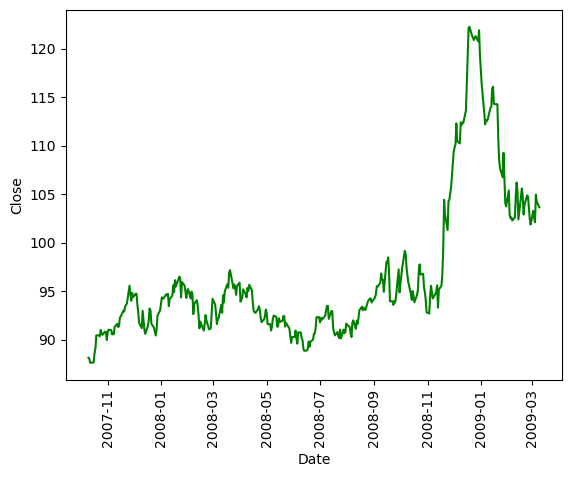

In [130]:
sns.lineplot(data=TLT2008, x='Date', y='Close', style_order='whitegrid', color='g')
plt.xticks(rotation=90)
plt.show()

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the TLT ETF during the 2020 Covid Pandemic market**

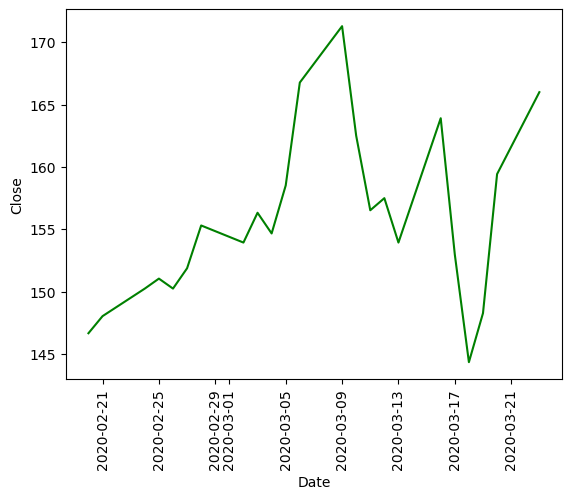

In [131]:
sns.lineplot(data=TLT2020, x='Date', y='Close', style_order='whitegrid', color='g')
plt.xticks(rotation=90)
plt.show()

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the TLT ETF during the current market downturn**

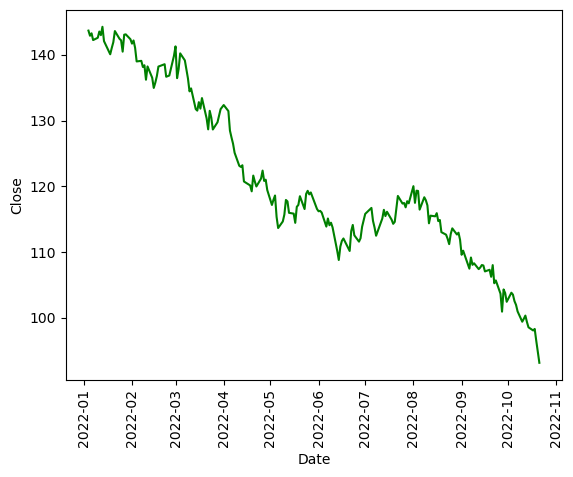

In [132]:
sns.lineplot(data=TLT2022, x='Date', y='Close', style_order='whitegrid', color='g')
plt.xticks(rotation=90)
plt.show()

**Merge the datasets specifying an Outer Join of SPY and TLT during the 2008 Housing Market Crash to create a new dataset saved to the variable Market2008**

In [133]:
Market2008 = pd.merge(SPY2008, TLT2008, how="outer", on=['Date'])
Market2008.head()

Date     Close_x  Close_y
0 2007-10-10  156.220001    88.15
1 2007-10-11  155.470001    88.06
2 2007-10-12  156.330002    87.63
3 2007-10-15  155.009995    87.65
4 2007-10-16  153.779999    87.68

**Rename the column holding the SPY ETF data as S&P500 and the column holding the TLT ETF data as Treasuries**

In [134]:
Market2008.columns = ['Date', 'S&P 500', 'Treasuries']
Market2008.head()

Date     S&P 500  Treasuries
0 2007-10-10  156.220001       88.15
1 2007-10-11  155.470001       88.06
2 2007-10-12  156.330002       87.63
3 2007-10-15  155.009995       87.65
4 2007-10-16  153.779999       87.68

**Merge the datasets specifying an Outer Join of SPY and TLT during the 2020 Covid Pandemic market drop to create a new dataset saved to the variable Market2020**

In [135]:
Market2020 = pd.merge(SPY2020, TLT2020, how="outer", on=['Date'])
Market2020.head()

Date  Close_x  Close_y
0 2020-02-20   336.95   146.67
1 2020-02-21   333.48   148.04
2 2020-02-24   322.42   150.25
3 2020-02-25   312.65   151.05
4 2020-02-26   311.50   150.25

**Rename the column holding the SPY ETF data as S&P500 and the column holding the TLT ETF data as Treasuries**

In [136]:
Market2020.columns = ['Date', 'S&P 500', 'Treasuries']
Market2020.head()

Date  S&P 500  Treasuries
0 2020-02-20   336.95      146.67
1 2020-02-21   333.48      148.04
2 2020-02-24   322.42      150.25
3 2020-02-25   312.65      151.05
4 2020-02-26   311.50      150.25

**Merge the datasets specifying an Outer Join of SPY and TLT during the current Market drop to create a new dataset saved to the variable Market2022**

In [137]:
Market2022 = pd.merge(SPY2022, TLT2022, how="outer", on=['Date'])
Market2022.head()

Date  Close_x  Close_y
0 2022-01-04   477.55   143.70
1 2022-01-05   468.38   142.92
2 2022-01-06   467.94   143.29
3 2022-01-07   466.09   142.26
4 2022-01-10   465.51   142.61

**Rename the column holding the SPY ETF data as S&P500 and the column holding the TLT ETF data as Treasuries**

In [138]:
Market2022.columns = ['Date', 'S&P 500', 'Treasuries']
Market2022.head()

Date  S&P 500  Treasuries
0 2022-01-04   477.55      143.70
1 2022-01-05   468.38      142.92
2 2022-01-06   467.94      143.29
3 2022-01-07   466.09      142.26
4 2022-01-10   465.51      142.61

**Use Mix-Max Scaling to Normalized the Data, so that the 2008 S&P data and Treasuries data can be plotted in the same area**

In [139]:
Market2008['S&P 500'] = (Market2008['S&P 500'] - Market2008['S&P 500'].min()) / (Market2008['S&P 500'].max() - Market2008['S&P 500'].min())
Market2008['Treasuries'] = (Market2008['Treasuries'] - Market2008['Treasuries'].min()) / (Market2008['Treasuries'].max() - Market2008['Treasuries'].min())
Market2008.head()

Date   S&P 500  Treasuries
0 2007-10-10  0.998753    0.015016
1 2007-10-11  0.990252    0.012417
2 2007-10-12  1.000000    0.000000
3 2007-10-15  0.985037    0.000578
4 2007-10-16  0.971095    0.001444

**Plot the normalized data so 2008 S&P 500 and Treasuries can be compared visually**

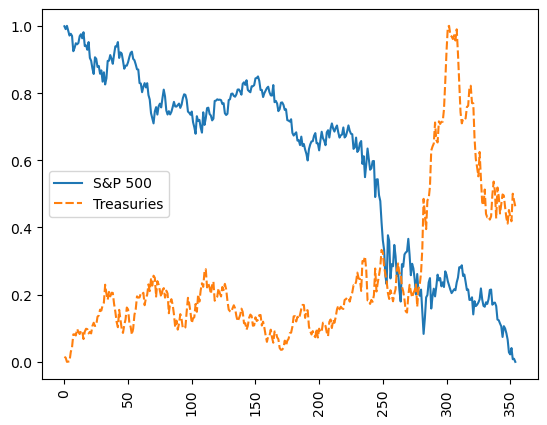

In [140]:
sns.lineplot(data=Market2008)
plt.xticks(rotation=90)
plt.show()

**Use Mix-Max Scaling to Normalized the Data, so that the 2020 S&P data and Treasuries data can be plotted in the same area**

In [141]:
Market2020['S&P 500'] = (Market2020['S&P 500'] - Market2020['S&P 500'].min()) / (Market2020['S&P 500'].max() - Market2020['S&P 500'].min())
Market2020['Treasuries'] = (Market2020['Treasuries'] - Market2020['Treasuries'].min()) / (Market2020['Treasuries'].max() - Market2020['Treasuries'].min())
Market2020.head()

Date   S&P 500  Treasuries
0 2020-02-20  1.000000    0.086117
1 2020-02-21  0.969561    0.136971
2 2020-02-24  0.872544    0.219005
3 2020-02-25  0.786842    0.248701
4 2020-02-26  0.776754    0.219005

**Plot the normalized data so 2020 S&P 500 and Treasuries can be compared visually**

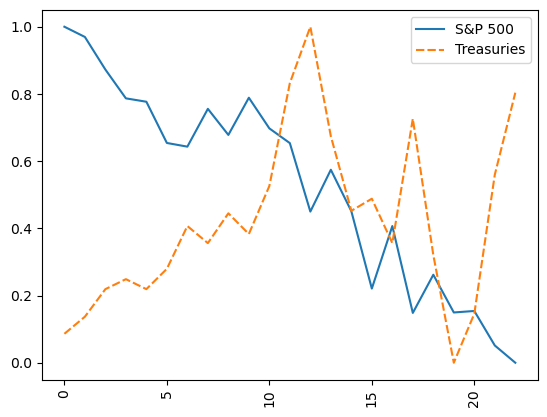

In [142]:
sns.lineplot(data=Market2020)
plt.xticks(rotation=90)
plt.show()

**Use Mix-Max Scaling to Normalized the Data, so that the 2022 S&P data and Treasuries data can be plotted in the same area**

In [143]:
Market2022['S&P 500'] = (Market2022['S&P 500'] - Market2022['S&P 500'].min()) / (Market2022['S&P 500'].max() - Market2022['S&P 500'].min())
Market2022['Treasuries'] = (Market2022['Treasuries'] - Market2022['Treasuries'].min()) / (Market2022['Treasuries'].max() - Market2022['Treasuries'].min())
Market2022.head()

Date   S&P 500  Treasuries
0 2022-01-04  1.000000    0.988652
1 2022-01-05  0.924209    0.973391
2 2022-01-06  0.920572    0.980630
3 2022-01-07  0.905281    0.960477
4 2022-01-10  0.900488    0.967325

**Plot the normalized data so 2022 S&P 500 and Treasuries can be compared visually**

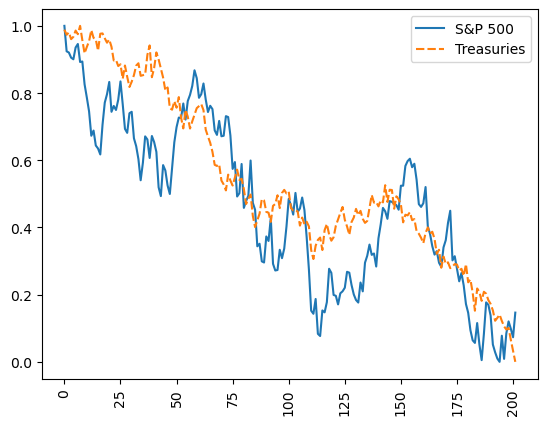

In [145]:
sns.lineplot(data=Market2022)
plt.xticks(rotation=90)
plt.show()